In [1]:
# Import the required libraries and dependencies
import os
from dotenv import load_dotenv
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key )

# Create the Alpaca REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [2]:
# Set the ticker information
tickers = ["MSFT","KO"]

# Set timeframe to '1Day'
timeframe = "1Day"

# Set start and end datetimes between now and 3 years ago
start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Get 3 years’ worth of historical price data for Microsoft and Coca-Cola
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
MSFT = prices_df[prices_df['symbol']=='MSFT'].drop('symbol', axis=1)
KO = prices_df[prices_df['symbol']=='KO'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([MSFT, KO], axis=1, keys=["MSFT", "KO"])

# Review the first 5 rows of the DataFrame
prices_df.head()

MSFT                                              \
                            open   high     low  close    volume trade_count   
timestamp                                                                      
2017-05-01 04:00:00+00:00  68.68  69.55  68.500  69.41  31954462      159425   
2017-05-02 04:00:00+00:00  69.71  69.71  69.130  69.30  23906119      127335   
2017-05-03 04:00:00+00:00  69.26  69.38  68.710  69.08  28927975      146503   
2017-05-04 04:00:00+00:00  69.03  69.08  68.640  68.81  21749409      109653   
2017-05-05 04:00:00+00:00  68.88  69.03  68.485  69.00  19128782       94910   

                                         KO                                  \
                                vwap   open    high    low  close    volume   
timestamp                                                                     
2017-05-01 04:00:00+00:00  69.161515  43.15  43.500  43.10  43.22  13213724   
2017-05-02 04:00:00+00:00  69.418084  43.22  43.440  43.16  43.39  11825216   
2017-05-03 04:00:00+00:00  68.935096  43.33  43.485  43.15  43.32  10404027   
2017-05-04 04:00:00+00:00  68.820273  43.45  43.810  43.40  43.66  10193084   
2017-05-05 04:00:00+00:00  68.801152  43.84  43.840  43.56  43.69   8133039   

                                                  
                          trade_count       vwap  
timestamp                                         
2017-05-01 04:00:00+00:00       51614  43.317026  
2017-05-02 04:00:00+00:00       53704  43.327701  
2017-05-03 04:00:00+00:00       49212  43.355317  
2017-05-04 04:00:00+00:00       46642  43.634758  
2017-05-05 04:00:00+00:00       38314  43.668253

In [3]:
# Import the MCSimulation module from the MCForecastTools library file
from MCForecastTools import MCSimulation

# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [4]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [5]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

MSFT                                              \
                            open   high     low  close    volume trade_count   
timestamp                                                                      
2017-05-01 04:00:00+00:00  68.68  69.55  68.500  69.41  31954462      159425   
2017-05-02 04:00:00+00:00  69.71  69.71  69.130  69.30  23906119      127335   
2017-05-03 04:00:00+00:00  69.26  69.38  68.710  69.08  28927975      146503   
2017-05-04 04:00:00+00:00  69.03  69.08  68.640  68.81  21749409      109653   
2017-05-05 04:00:00+00:00  68.88  69.03  68.485  69.00  19128782       94910   

                                                      KO                 \
                                vwap daily_return   open    high    low   
timestamp                                                                 
2017-05-01 04:00:00+00:00  69.161515          NaN  43.15  43.500  43.10   
2017-05-02 04:00:00+00:00  69.418084    -0.001585  43.22  43.440  43.16   
2017-05-03 04:00:00+00:00  68.935096    -0.003175  43.33  43.485  43.15   
2017-05-04 04:00:00+00:00  68.820273    -0.003909  43.45  43.810  43.40   
2017-05-05 04:00:00+00:00  68.801152     0.002761  43.84  43.840  43.56   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2017-05-01 04:00:00+00:00  43.22  13213724       51614  43.317026          NaN  
2017-05-02 04:00:00+00:00  43.39  11825216       53704  43.327701     0.003933  
2017-05-03 04:00:00+00:00  43.32  10404027       49212  43.355317    -0.001613  
2017-05-04 04:00:00+00:00  43.66  10193084       46642  43.634758     0.007849  
2017-05-05 04:00:00+00:00  43.69   8133039       38314  43.668253     0.000687

In [6]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/pdenormandie/Desktop/Quandl_API_Key/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000974,0.987277,0.992760,0.988295,0.995810,1.002076,0.991206,1.007145,1.002010,0.992625,...,0.997911,0.992770,0.998441,1.007259,1.004666,1.008653,0.989828,0.994033,0.992114,1.017457
2,1.003202,1.004539,1.000414,0.992813,1.013831,1.012273,0.990290,1.020017,0.999031,0.981686,...,1.003205,0.998171,0.993544,1.009195,0.989068,1.002342,0.986981,1.002820,0.987076,1.004935
3,1.012267,1.030712,1.000588,0.986662,1.030442,1.031680,0.984508,1.021237,0.997206,0.985787,...,0.989688,0.987133,1.015146,1.023046,0.994545,1.016320,0.997444,0.985752,0.962283,1.009872
4,0.992892,1.015235,1.016710,0.987442,1.015044,1.029440,1.008456,1.014803,1.002745,0.990059,...,0.973126,0.972553,1.006523,1.027719,0.984511,1.026276,0.995825,0.990975,0.955497,1.002718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.523887,5.567515,3.069164,2.842601,2.056284,11.833462,3.057250,2.642091,4.607402,1.478934,...,3.708809,4.803295,3.187940,4.482339,5.003986,2.170755,2.040867,3.140153,2.440760,1.933546
1257,1.475397,5.606951,3.109925,2.843794,2.031387,11.932404,3.093675,2.662386,4.618859,1.467991,...,3.758952,4.725791,3.187107,4.469951,5.048657,2.204896,2.037463,3.060336,2.479014,1.905072
1258,1.473472,5.679973,3.093540,2.800556,2.053564,11.854965,3.112603,2.625911,4.578297,1.510465,...,3.800598,4.732379,3.171648,4.323795,5.042437,2.151976,2.081378,3.070360,2.495966,1.859990
1259,1.465503,5.637125,3.092666,2.804818,2.090341,11.725296,3.189981,2.657650,4.516735,1.496780,...,3.771704,4.819289,3.156959,4.337977,4.956505,2.150192,2.088301,3.066522,2.501207,1.867301


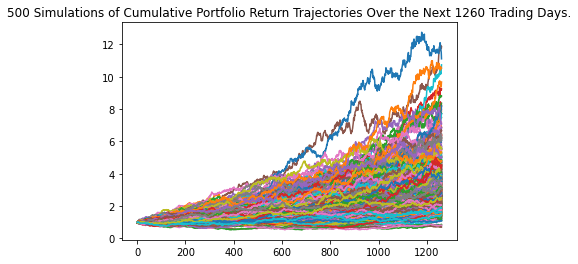

In [7]:
# Plot simulation outcomes
MC_sim_line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future use
MC_sim_line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

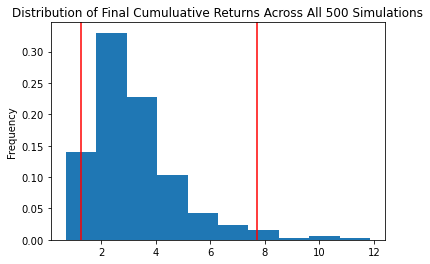

In [8]:
# Plot probability distribution and confidence intervals
MC_sim_dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future use
MC_sim_dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')